In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

%matplotlib inline

# Read Data

In [2]:
# Read file and pass in 
diabetes = pd.read_csv("diabetic_data.csv")

diabetes.head()

medications_full = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

medications = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

# replace missing with np.nan
diabetes.replace('?', np.nan, inplace = True)
# diabetes.isnull().sum(axis =0)
# missingcols = ['race', 'weight','payer_code','medical_specialty', 'diag_1','diag_2','diag_3']

list(set(medications_full) - set(medications))

['examide', 'citoglipton']

In [3]:
diabetes.race.value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

# Make Output Binary

In [4]:
# Binary Classfication of Readmission Attribute
diabetes.readmitted.replace('NO','otherwise', inplace = True)
diabetes.readmitted.replace('>30','otherwise', inplace = True)
diabetes.readmitted.replace('<30','readmitted', inplace = True)
diabetes.readmitted.replace('otherwise',0, inplace = True)
diabetes.readmitted.replace('readmitted',1, inplace = True)


# Dummification

#### Easy Dummification 
- gender (easy: just drop NAs + make 0 or 1)  
- change (easy: 0 or 1) 
- diabetesMed (easy: 0 or 1) 

#### Columns to Dummify
- race (consolidated sparse data in larger buckets 3) 
- age (dummify buckets) 
- admission_type_id (replace numbers with corresponding qualitative value and bucket/dummify) 
- discharge_disposition_id (replace numbers with corresponding qualitative value and bucket/ dummify) 
- admission_source_id (replace numbers with corresponding qualitative value and dummify) 
- medical_specialty (replace numbers with corresponding qualitative value and dummify) 
- diag_1 (bucket / dummify)
- diag_2 (bucket / dummify)
- diag_3 (bucket / dummify)
- max_glu_serum (bucket / dummify)
- A1Cresult (bucket / dummify)
- medications





### Easy Dummification

In [5]:
# DiabetesMed - Dummify
diabetes.diabetesMed.replace('Yes',1, inplace = True)
diabetes.diabetesMed.replace('No',0, inplace = True)

# DiabetesChange - "Dummify"
diabetes.change.replace('Ch',1, inplace = True)
diabetes.change.replace('No',0, inplace = True)
 
# Diabetes.Gender - Dummify + Drop Unknowns
diabetes.gender.replace('Male', 1, inplace = True)
diabetes.gender.replace('Female', 0, inplace = True)

### Dummification

In [6]:
# Race 
diabetes.race = [x if x in ['Caucasian', 'AfricanAmerican','Asian'] else 'Other' for x in diabetes.race]

# Age
diabetes.age = ['[60, 100)' if x in ['[70-80)','[60-70)','[80-90)','[90-100)'] else 
 '[30, 60)' if x in ['[50-60)','[40-50)','[30-40)'] else 
 '<30' for x in diabetes.age]

# Admissions Source 
emergency = [7]
referral = [1,2,3]
diabetes.admission_source_id = ['Referral' if x in referral else 
 'Emergency' if x in emergency else 
 'Other' for x in diabetes.admission_source_id]

# Discharge 
expired = [11,19,20,21]
home = [1,6,8,13]
diabetes.discharge_disposition_id = ['Home' if x in home else 
           'Expired' if x in expired else 
           'Other' for x in diabetes.discharge_disposition_id]

# Medical Specialty 
cardiology = ['Cardiology',
 'Cardiology-Pediatric']
generalpractice = ['Family/GeneralPractice']
internalmedicine = ['InternalMedicine']
missing = ['?']
surgery = ['Surgeon',
 'Surgery-Cardiovascular',
 'Surgery-Cardiovascular/Thoracic',
 'Surgery-Colon&Rectal',
 'Surgery-General',
 'Surgery-Maxillofacial',
 'Surgery-Neuro',
 'Surgery-Pediatric',
 'Surgery-Plastic',
 'Surgery-PlasticwithinHeadandNeck',
 'Surgery-Thoracic',
 'Surgery-Vascular',
 'SurgicalSpecialty']

diabetes.medical_specialty = ['Cardiology' if x in cardiology else 
 "General Practice" if x in generalpractice else 
 'Internal Medicine' if x in internalmedicine else
 'Surgery' if x in surgery else 
 'Missing' if x in missing else 
 'Other' for x in diabetes.medical_specialty]

# A1C 
diabetes['HA1C']=pd.Series(len(diabetes['A1Cresult']), index=diabetes)
diabetes['HA1C']= 'Not Measured'
diabetes.loc[(diabetes['A1Cresult']=='Norm') | (diabetes['A1Cresult']=='>7'), 'HA1C']= 'Normal'
diabetes.loc[(diabetes['A1Cresult']=='>8') & (diabetes['change']==0), 'HA1C']= 'High, not changed'
diabetes.loc[(diabetes['A1Cresult']=='>8') & (diabetes['change']== 1), 'HA1C']= 'High, changed'

# diagnosis

In [7]:
# Race
race_dummy = pd.get_dummies(diabetes.race, prefix = "race", drop_first=True)

# Age
age_dummy = pd.get_dummies(diabetes.age, prefix = 'age', drop_first = True)

# Admissions Source
admissions_dummy = pd.get_dummies(diabetes.admission_source_id, prefix = 'Admissions', drop_first=True)

# Discharge 
discharge_dummy = pd.get_dummies(diabetes.discharge_disposition_id, prefix = 'discharge', drop_first=True)

# Medical Specialty
specialty_dummy = pd.get_dummies(diabetes.medical_specialty, prefix = 'specialty', drop_first = True)

# A1C
a1c_dummy = pd.get_dummies(diabetes.HA1C, prefix = 'a1c')
a1c_dummy.drop(columns = ['a1c_Not Measured'], inplace = True)

# Medications 
med_eda = diabetes[medications]
med_eda
med_dummy = pd.get_dummies(med_eda, columns = medications, drop_first = True)
diabetes.drop(columns = medications_full, inplace = True )

# Diagnosis 

In [8]:
diabetes.drop(columns = ['race','age','weight',
               'admission_type_id','discharge_disposition_id',
               'admission_source_id','payer_code','medical_specialty', 'A1Cresult','HA1C'], inplace = True)

In [9]:
readmitted = diabetes.pop('readmitted')
# diabetes['readmitted'] = readmitted


In [10]:
diabetes_final = diabetes.copy()
diabetes_final = pd.concat([diabetes_final, race_dummy], axis = 1)
diabetes_final = pd.concat([diabetes_final, age_dummy], axis = 1)
diabetes_final = pd.concat([diabetes_final, admissions_dummy], axis = 1)
diabetes_final = pd.concat([diabetes_final, discharge_dummy], axis = 1)
diabetes_final = pd.concat([diabetes_final, specialty_dummy], axis = 1)
diabetes_final = pd.concat([diabetes_final, a1c_dummy], axis = 1)
diabetes_final = pd.concat([diabetes_final, med_dummy], axis = 1)
diabetes_final['readmitted'] = readmitted
diabetes_final = diabetes_final.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
diabetes_final.drop(columns = ['encounter_id', 'patient_nbr','diag_1','diag_2','diag_3','max_glu_serum'], inplace = True)
diabetes_final = diabetes_final[diabetes_final.gender != 'Unknown/Invalid']


# diabetes_final = pd.concat([diabetes_final, diag_dummy], axis = 1)
diabetes_final.shape

(71515, 76)

In [11]:
y = diabetes_final.readmitted
X = diabetes_final.iloc[:,:-1]

In [12]:
print(y.shape)
print(X.shape)

(71515,)
(71515, 75)


# Model Training

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report

# Separate test from data set 
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Test 
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size = 0.15, random_state = 0)


In [ ]:
diabetes_model = LogisticRegression()

In [ ]:
diabetes_model.fit(X_train, y_train)

In [ ]:
predictions = diabetes_model.predict(X_val)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
# print(classification_report(y_val, predictions))
# print(confusion_matrix(y_val, predictions))

### SMOTE - Inbalanced Set

In [14]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2) 
X_balanced, y_balanced = sm.fit_sample(X, y) 

In [15]:
diabetes_model_balanced = LogisticRegression()
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_balanced, y_balanced, test_size = 0.3, random_state=0)
diabetes_model_balanced.fit(X_train_res,y_train_res)
# send to brian, take out 15-20% and apply model and examine AUC. 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
balanced_predict = diabetes_model_balanced.predict(X_test_res)

print(classification_report(y_test_res, balanced_predict))
confusion_matrix(y_test_res, balanced_predict)


              precision    recall  f1-score   support

           0       0.85      0.92      0.89     19388
           1       0.92      0.84      0.88     19746

    accuracy                           0.88     39134
   macro avg       0.88      0.88      0.88     39134
weighted avg       0.88      0.88      0.88     39134



array([[17929,  1459],
       [ 3183, 16563]])

### Grid Search 

In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {'penalty':['l1', 'l2', 'elasticnet'],'C':[0.01, 0.1, 1, 10, 100, 1000], 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
diabetes_gs = GridSearchCV(diabetes_model_balanced, param_grid, n_jobs = -1, cv = 5, verbose = 1)
diabetes_gs.fit(X_train_res, y_train_res)


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 45.1min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed: 46.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, ve

In [20]:
diabetes_gs.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

In [24]:
predictions_gs = diabetes_gs.predict(X_test_res)
print(classification_report(y_test_res, predictions_gs))
print(confusion_matrix(y_test_res, predictions_gs))
print(diabetes_gs.best_params_)

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     19388
           1       0.94      0.85      0.89     19746

    accuracy                           0.90     39134
   macro avg       0.90      0.90      0.90     39134
weighted avg       0.90      0.90      0.90     39134

[[18405   983]
 [ 2993 16753]]
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [22]:
print(classification_report(y_test, diabetes_gs.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     19590
           1       0.07      0.04      0.05      1865

    accuracy                           0.87     21455
   macro avg       0.49      0.49      0.49     21455
weighted avg       0.84      0.87      0.85     21455



In [23]:
pd.DataFrame(diabetes_gs.predict_proba(X_test))

,0,1
0,0.877775,0.122225
1,0.779107,0.220893
2,0.854532,0.145468
3,0.579079,0.420921
4,0.930684,0.069316
...,...,...
21450,0.779949,0.220051
21451,0.917879,0.082121
21452,0.785854,0.214146
21453,0.970369,0.029631


### Evaluate Model

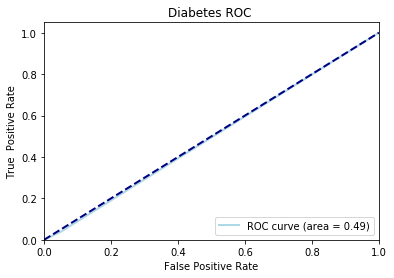

In [25]:
from sklearn.metrics import roc_curve, auc 
fpr, tpr, treshold = roc_curve(y_test, diabetes_gs.predict(X_test))
roc_auc  = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='lightblue',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True  Positive Rate')
plt.title('Diabetes ROC ')
plt.legend(loc='lower right')
plt.show()

## Function - med_change (optional) 

# Write CSV 

In [ ]:
# Functions: 
def med_change(df, column_list):
    '''
    This function takes utilizes the medication features as identified in the 
    column_list argument to derive a feature called medchange which counts the number
    of medications which have dosages that have changed - regardless of dosages 
    '''
    for x in column_list:
        tempname = str(x) + 'temp'
        df[tempname] = df[x].apply(lambda x: 0 if (x == "No" or x == "Steady") else 1)
    df['medchange'] = 0 
    for x in column_list:
        tempname = str(x) + 'temp'
        df['medchange'] = df['medchange'] + df[tempname]
        del df[tempname]
        
    return df.head().T


# Testing Function
med_eda2 = med_eda.copy()
med_change(med_eda2, medications)


In [ ]:
# Write a Function
# med_eda.drop(columns = ['readmitted'], inplace = True)
# med_eda.to_csv('./med_eda.csv', index = False)
# med_eda_final.to_csv('./med_eda_dummified', index = False)

# Evaluating Model 

In [ ]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_preds)

In [ ]:
validation_data = pd.read_csv('../kailun/data for Richard/validation.csv')
pd.read_csv('../kailun/data for Richard/X_train_all.csv')
pd.read_csv('../kailun/data for Richard/y_train_all.csv')

X_val= validation_data.iloc[:,1:validation_data.shape[1]-1]
y_val= validation_data['readmitted_yes']  
X_val_stand = StandardScaler().fit_transform(X_val) 